In [23]:
#Import some modules

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics


# Load and Prepare The Dataset

In [24]:
#Import the Dataset
digits = load_digits()

print(digits.data.shape)
print(digits.target.shape)

(1797, 64)
(1797,)


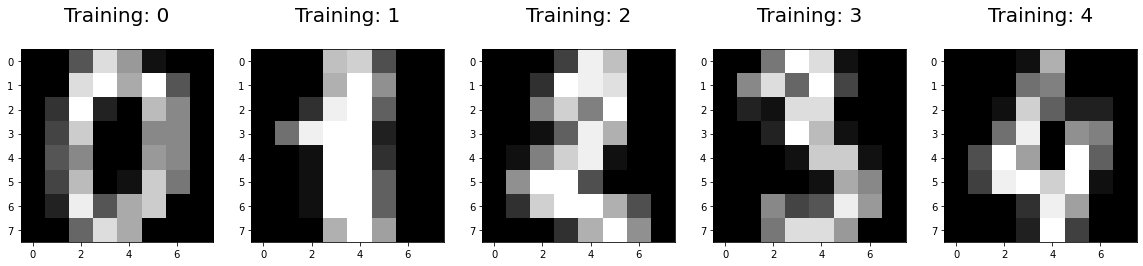

In [26]:

#Taking a look at the dataset
import numpy as np

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title("Training: %i\n" % label, fontsize=20)

In [27]:
#split the dataset into training and testing
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.23, random_state=2)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1383, 64)
(1383,)
(414, 64)
(414,)


# Model

In [28]:
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

logistic_reg.fit(x_train, y_train)

C:\Users\itzri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predict

In [7]:
print(logistic_reg.predict(x_test[0].reshape(1, -1)))

[4]


In [8]:
logistic_reg.predict(x_test[0:50])

array([4, 0, 9, 1, 8, 7, 1, 5, 1, 6, 6, 7, 6, 1, 5, 5, 8, 6, 2, 7, 4, 6,
       4, 1, 5, 2, 9, 5, 4, 6, 5, 6, 3, 4, 0, 9, 9, 8, 4, 6, 8, 8, 5, 7,
       9, 8, 9, 6, 1, 7])

In [9]:
predictions = logistic_reg.predict(x_test)

In [11]:
#Accuray-rate
score = logistic_reg.score(x_test, y_test)

print(score)


0.9516908212560387


# Confusion Matrix

In [29]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


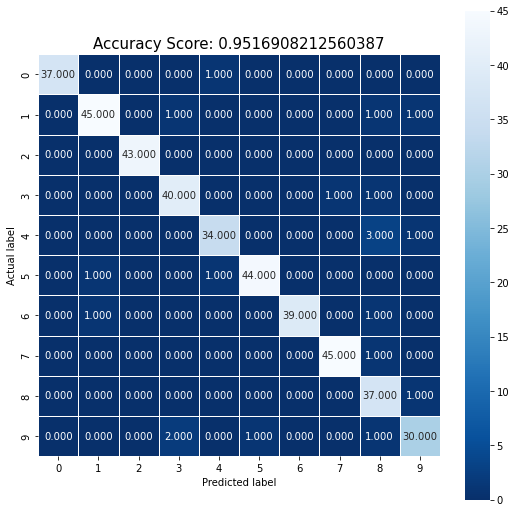

In [30]:
plt.figure(figsize=(9, 9))
sns.heatmap(cm ,annot=True, fmt=".3f", linewidths=.5, square=True, cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel("Predicted label");
all_sample_title = "Accuracy Score: {0}".format(score);
plt.title(all_sample_title, size=15);

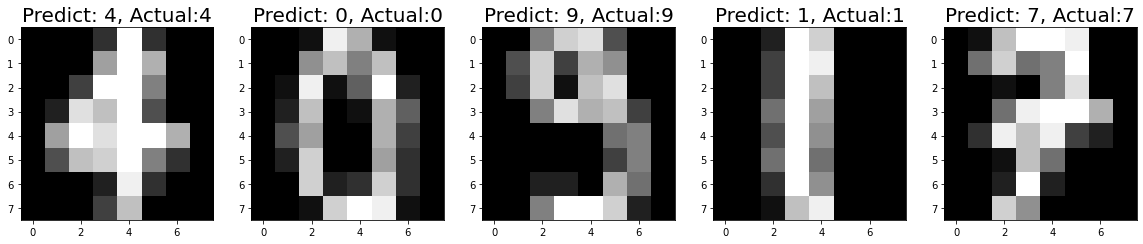

In [39]:
#Let's test our Model!
index_classified=[]
index = 0
for predict, actual in zip(predictions, y_test):
    if predict == actual:
        index_classified.append(index)
    index += 1
plt.figure(figsize=(20, 4))
    
for plotIndex, wrong in enumerate(index_classified[0:5]):
    plt.subplot(1, 5, plotIndex+1)
    plt.imshow(np.reshape(x_test[wrong], (8, 8)), cmap=plt.cm.gray)
    plt.title(f"Predict: {predictions[wrong]}, Actual:{y_test[wrong]}", fontsize=20)